In [31]:
from zipfile import ZipFile
import io
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

with ZipFile("images.zip") as zf:
    with zf.open("area0.npy") as f:
        buf = io.BytesIO(f.read())
        madison = np.load(buf)
madison.shape

(1200, 1200)

In [145]:
madison[:,:]

array([[81, 82, 82, ..., 82, 82, 82],
       [81, 81, 82, ..., 82, 82, 82],
       [81, 81, 81, ..., 82, 82, 82],
       ...,
       [82, 82, 82, ..., 81, 81, 81],
       [82, 82, 82, ..., 81, 81, 81],
       [82, 82, 82, ..., 81, 81, 81]], dtype=uint8)

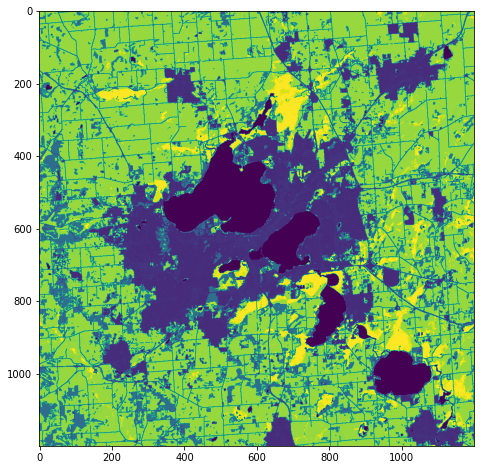

In [33]:
plt.figure(figsize=(8,8))
plt.imshow(madison)

In [34]:
use_cmap = np.zeros(shape=(256,4))
use_cmap[:,-1] = 1
uses = np.array([
    [0, 0.00000000000, 0.00000000000, 0.00000000000],
    [11, 0.27843137255, 0.41960784314, 0.62745098039],
    [12, 0.81960784314, 0.86666666667, 0.97647058824],
    [21, 0.86666666667, 0.78823529412, 0.78823529412],
    [22, 0.84705882353, 0.57647058824, 0.50980392157],
    [23, 0.92941176471, 0.00000000000, 0.00000000000],
    [24, 0.66666666667, 0.00000000000, 0.00000000000],
    [31, 0.69803921569, 0.67843137255, 0.63921568628],
    [41, 0.40784313726, 0.66666666667, 0.38823529412],
    [42, 0.10980392157, 0.38823529412, 0.18823529412],
    [43, 0.70980392157, 0.78823529412, 0.55686274510],
    [51, 0.64705882353, 0.54901960784, 0.18823529412],
    [52, 0.80000000000, 0.72941176471, 0.48627450980],
    [71, 0.88627450980, 0.88627450980, 0.75686274510],
    [72, 0.78823529412, 0.78823529412, 0.46666666667],
    [73, 0.60000000000, 0.75686274510, 0.27843137255],
    [74, 0.46666666667, 0.67843137255, 0.57647058824],
    [81, 0.85882352941, 0.84705882353, 0.23921568628],
    [82, 0.66666666667, 0.43921568628, 0.15686274510],
    [90, 0.72941176471, 0.84705882353, 0.91764705882],
    [95, 0.43921568628, 0.63921568628, 0.72941176471],
])
for row in uses:
    use_cmap[int(row[0]),:-1] = row[1:]
use_cmap = ListedColormap(use_cmap)

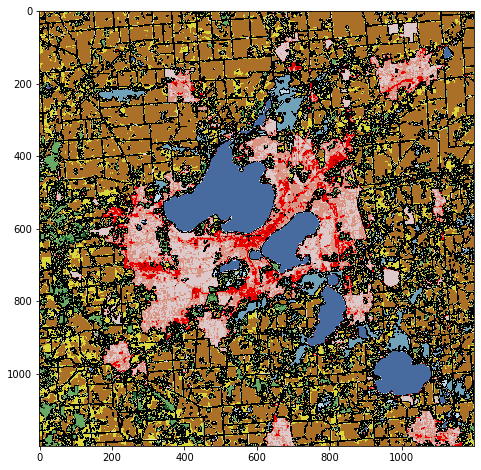

In [35]:
plt.figure(figsize=(8,8))
plt.imshow(madison, cmap=use_cmap, vmin=0, vmax=255)

In [181]:
import os
import sqlite3
import pandas as pd

assert os.path.exists("images.db")
c = sqlite3.connect("images.db")
name = 'area41.npy'

read = pd.read_sql("SELECT * FROM images", c)
index = int(read.loc[read['image'] == name]['place_id'])
read = pd.read_sql("SELECT * FROM places", c)
print(read)
exit = read.loc[read['place_id'] == index]
print(exit)
final = exit.iloc[0]['name']
final

     place_id        name        lat        lon
0         100       samp0  42.821935 -88.151540
1         101       samp1  45.170729 -88.397469
2         102       samp2  44.941672 -89.897391
3         103       samp3  43.101989 -88.899274
4         104       samp4  46.618371 -92.127578
..        ...         ...        ...        ...
105       205    appleton  44.280000 -88.390000
106       206    waukesha  43.010000 -88.250000
107       207     oshkosh  44.020000 -88.560000
108       208   eauclaire  44.820000 -91.490000
109       209  janesville  42.690000 -89.010000

[110 rows x 4 columns]
     place_id       name    lat    lon
101       201  milwaukee  43.06 -87.97


'milwaukee'

In [167]:
import zipfile
import sqlite3

def open(name):
    obj = Connection(name)
    with ZipFile.open(obj, name+".zip") as zf:
        return

class Connection:
    def __init__(self, name):
        self.db = sqlite3.connect(name+".db")
        self.zf = zipfile.ZipFile(name+".zip")

    def close(self):
        self.db.close()
        self.zf.close()
        
    def list_images(self):
        pass

In [168]:
with open("images") as c:
    # gets alphabetically sorted list of images
    # expected: ['area0.npy', 'area1.npy', 'area10.npy', 'area100.npy', ...]
    print(c.list_images())

AttributeError: 'Connection' object has no attribute 'fp'

In [152]:
c = Connection("images")

In [147]:
c.db